In [ ]:
import pandas as pd
import numpy as np
import pycountry_convert as pc

df = pd.read_csv("./ThemeParkAnalysis/data/raw/updated_disneylandreviews.csv")
df.fillna({'Rating': df['Rating'].mean(), 'Sentiment': df['Sentiment'].mean()}, inplace=True)

df['Visit_Type'] = df['Review_Text'].apply(lambda x: 
    'Family' if any(word in x.lower() for word in ['family', 'my kids', 'the kids', 'my children', 'parents', 'wife', 'husband', 'baby', 
                       'toddler', 'son', 'daughter', 'mom', 'dad', 'grandma', 'grandpa', 'grandmother', 'grandfather', 'grandchild', 'grandchildren', 'grandson', 'grandaughter', 
                       'cousins', 'nephew', 'niece', 'the kids', 'little ones', 'family-friendly']) else
    'Couples' if any(word in x.lower() for word in ['boyfriend', 'girlfriend', 'my partner', 'honeymoon', 'fiance', 'fiancee', 'anniversary trip', 'couples retreat' ]) else                                                                                 
    'Friends' if any(word in x.lower() for word in ['friends', 'buddies', 'hangout', 'bestie', 'friend']) else                                                                
    'Solo' if any(word in x.lower() for word in ['solo trip', 'by myself']) else 'Unknown'
)

df = df.drop(columns=['Review_ID', 'Review_Text'])  

def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return "Unknown"  

df["Continent"] = df["Reviewer_Location"].apply(country_to_continent)

df_all = df
df_hongkong = df[df['Branch'] == 'Disneyland_HongKong']
df_california = df[df['Branch'] == 'Disneyland_California']
df_paris = df[df['Branch'] == 'Disneyland_Paris']

df.head()

,Rating,Reviewer_Location,Branch,Year,Month,Sentiment,Visit_Type,Continent
0,4,Australia,Disneyland_HongKong,2019,4,0.7069,Unknown,Oceania
1,4,Philippines,Disneyland_HongKong,2019,5,0.9901,Unknown,Asia
2,4,United Arab Emirates,Disneyland_HongKong,2019,4,0.9920,Unknown,Asia
3,4,Australia,Disneyland_HongKong,2019,4,0.8489,Unknown,Oceania
4,4,United Kingdom,Disneyland_HongKong,2019,4,0.2846,Family,Europe


Gaining some insights of the relationships

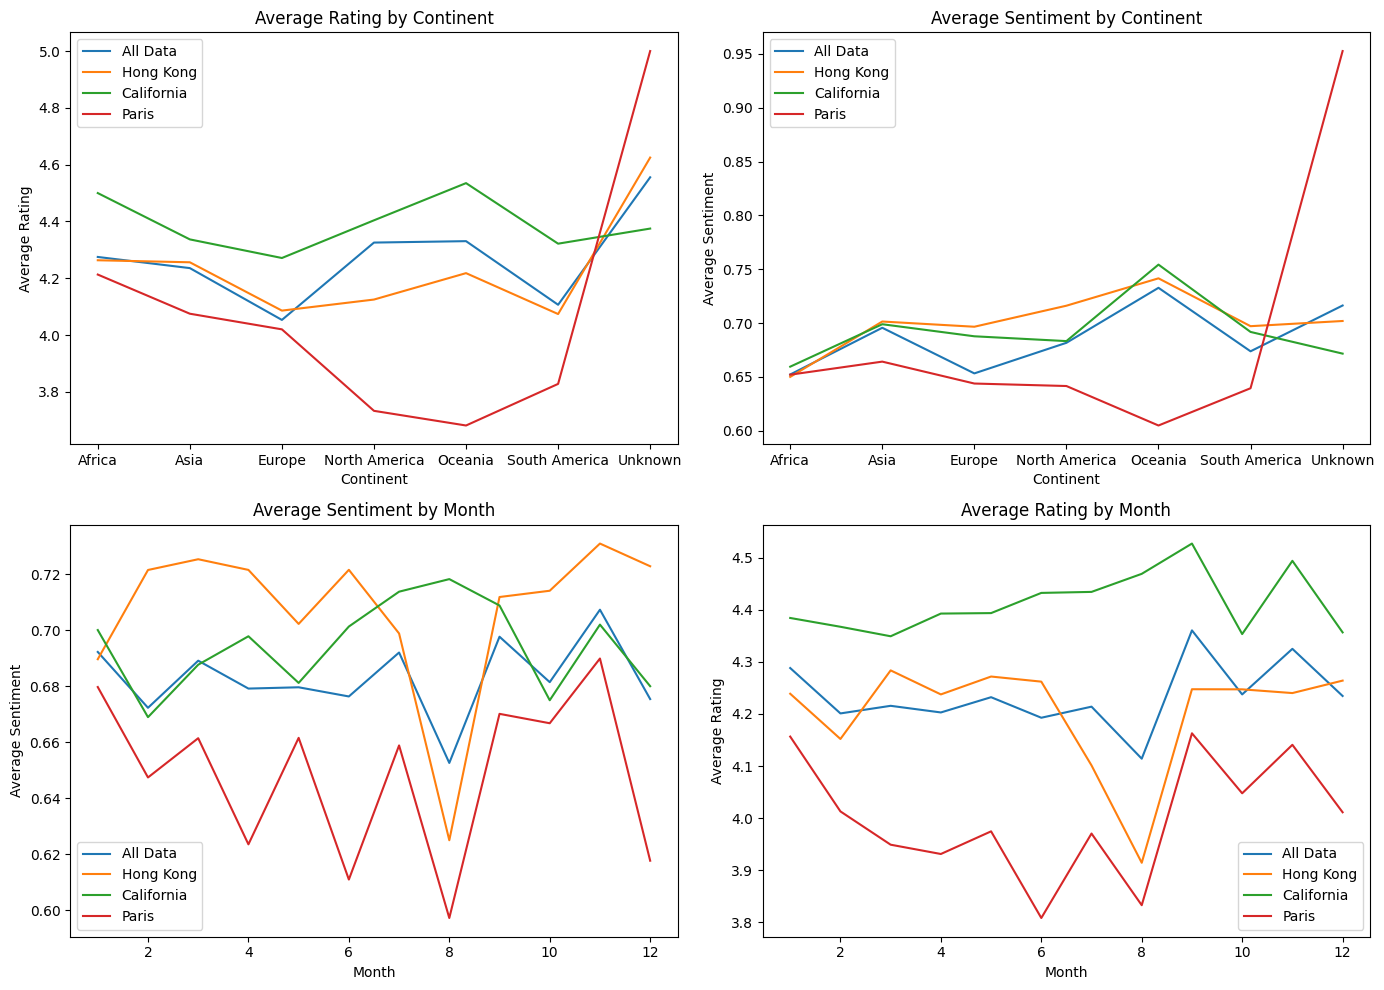

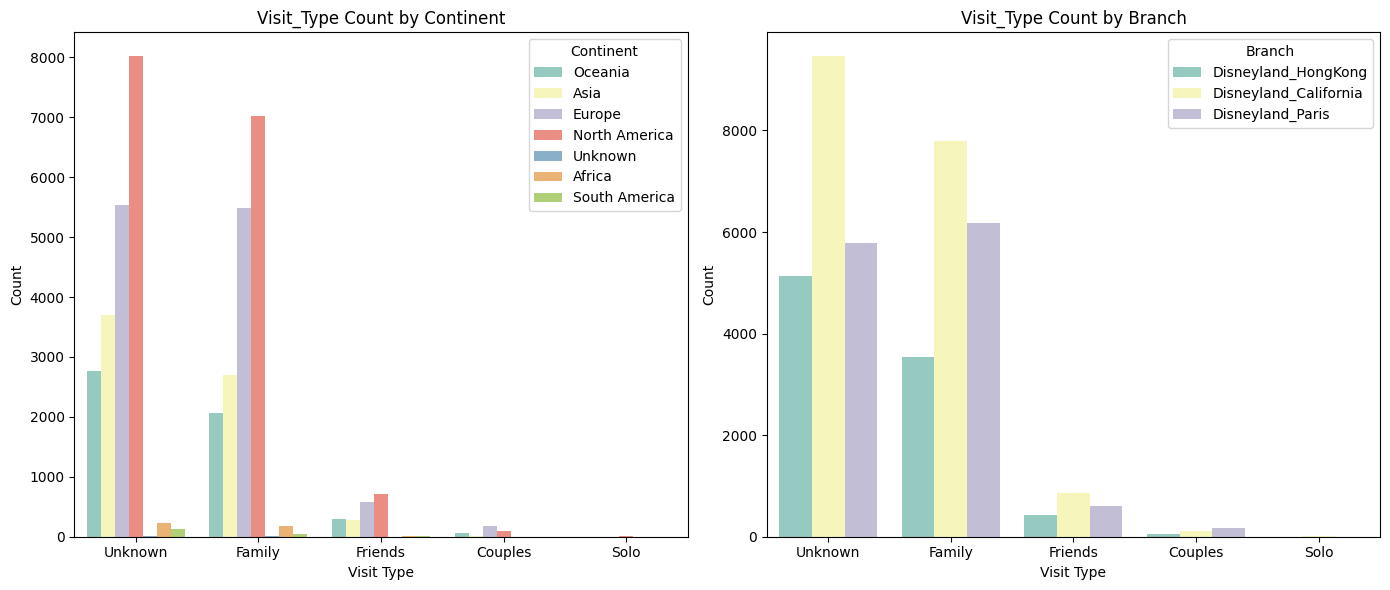

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

datasets = {
    "All Data": df_all,
    "Hong Kong": df_hongkong,
    "California": df_california,
    "Paris": df_paris
}

# Plot Average Rating by Continent
for i, (name, data) in enumerate(datasets.items()):
    axs[0, 0].plot(data.groupby('Continent')['Rating'].mean(), label=name)

axs[0, 0].set_title('Average Rating by Continent')
axs[0, 0].set_xlabel('Continent')
axs[0, 0].set_ylabel('Average Rating')
axs[0, 0].legend()

# Plot Average Sentiment by Continent
for i, (name, data) in enumerate(datasets.items()):
    axs[0, 1].plot(data.groupby('Continent')['Sentiment'].mean(), label=name)

axs[0, 1].set_title('Average Sentiment by Continent')
axs[0, 1].set_xlabel('Continent')
axs[0, 1].set_ylabel('Average Sentiment')
axs[0, 1].legend()

# Plot Average Sentiment by Month
for i, (name, data) in enumerate(datasets.items()):
    axs[1, 0].plot(data.groupby('Month')['Sentiment'].mean(), label=name)

axs[1, 0].set_title('Average Sentiment by Month')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Average Sentiment')
axs[1, 0].legend()

# Plot Average Rating by Month
for i, (name, data) in enumerate(datasets.items()):
    axs[1, 1].plot(data.groupby('Month')['Rating'].mean(), label=name)

axs[1, 1].set_title('Average Rating by Month')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Average Rating')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

fig2, axs2 = plt.subplots(1, 2, figsize=(14, 6))

# Count Visit_Type by Continent
sns.countplot(x='Visit_Type', hue='Continent', data=df_all, ax=axs2[0], palette="Set3")
axs2[0].set_title('Visit_Type Count by Continent')
axs2[0].set_xlabel('Visit Type')
axs2[0].set_ylabel('Count')

# Count Visit_Type by Branch
sns.countplot(x='Visit_Type', hue='Branch', data=df_all, ax=axs2[1], palette="Set3")
axs2[1].set_title('Visit_Type Count by Branch')
axs2[1].set_xlabel('Visit Type')
axs2[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

DBSCAN

C:\Users\angsp\AppData\Local\Temp\ipykernel_7864\811431528.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DBSCAN_Cluster', y='Rating', data=df_dbscan, palette="Set3")
C:\Users\angsp\AppData\Local\Temp\ipykernel_7864\811431528.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DBSCAN_Cluster', y='Sentiment', data=df_dbscan, palette="Set3")


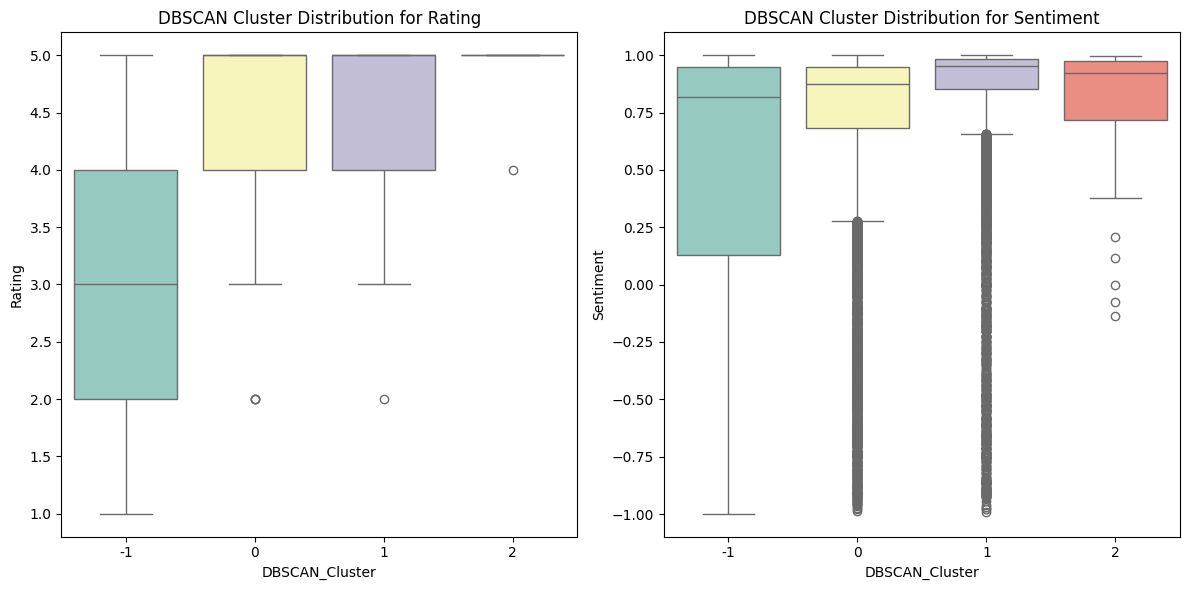

DBSCAN Cluster Descriptive Statistics:

                 Rating                                               \
                  count      mean       std  min  25%  50%  75%  max   
DBSCAN_Cluster                                                         
-1              12590.0  3.186577  1.195110  1.0  2.0  3.0  4.0  5.0   
 0              15394.0  4.707289  0.489681  2.0  4.0  5.0  5.0  5.0   
 1              12091.0  4.703085  0.491287  2.0  4.0  5.0  5.0  5.0   
 2                 92.0  4.989130  0.104257  4.0  5.0  5.0  5.0  5.0   

               Sentiment            ...                    Month            \
                   count      mean  ...     75%     max    count      mean   
DBSCAN_Cluster                      ...                                      
-1               12590.0  0.472873  ...  0.9488  0.9997  12590.0  6.559333   
 0               15394.0  0.727984  ...  0.9496  0.9991  15394.0  6.933416   
 1               12091.0  0.840216  ...  0.9838  0.9999  12091.0 

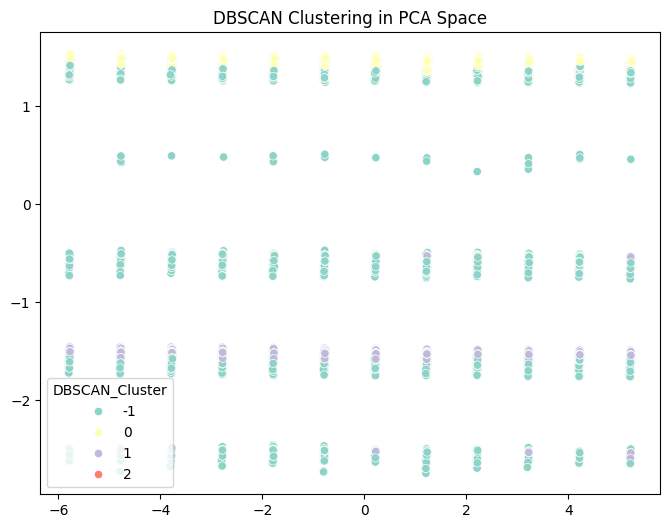

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


df_dbscan = df_all.copy()

df_dbscan['Visit_Type'] = df_dbscan['Visit_Type'].astype('category').cat.codes
df_dbscan['Continent'] = df_dbscan['Continent'].astype('category').cat.codes
features = ['Rating', 'Sentiment', 'Month', 'Visit_Type', 'Continent']

dbscan = DBSCAN(eps=1, min_samples=100)  
df_dbscan['DBSCAN_Cluster'] = dbscan.fit_predict(df_dbscan[features])


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='DBSCAN_Cluster', y='Rating', data=df_dbscan, palette="Set3")
plt.title('DBSCAN Cluster Distribution for Rating')

plt.subplot(1, 2, 2)
sns.boxplot(x='DBSCAN_Cluster', y='Sentiment', data=df_dbscan, palette="Set3")
plt.title('DBSCAN Cluster Distribution for Sentiment')

plt.tight_layout()
plt.show()

# Check the DBSCAN cluster distribution
dbscan_stats = df_dbscan.groupby('DBSCAN_Cluster')[['Rating', 'Sentiment', 'Month']].describe()

# Show the DBSCAN stats for each cluster
print("DBSCAN Cluster Descriptive Statistics:\n")
print(dbscan_stats)

# Visualizing DBSCAN clusters in PCA space
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_dbscan[features])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df_dbscan['DBSCAN_Cluster'], palette='Set3')
plt.title('DBSCAN Clustering in PCA Space')
plt.show()


Cluster -1 (Noise/Outliers)

These points do not fit into any cluster's density, but these reviews aren't necessarily good or bad, but rather unusual combinations of the features that did not meet any of the other density threshold. This group might contain visitors from less common months or continent, or with a combination of moderate rating and sentiment that places them outside the denser regions of the data.

Cluster 0 (Moderate Satisfaction)
Rating: Mean rating is around 3.24.
Sentiment: The boxplot suggests a wide range, likely neutral to slightly positive.
Month: Not fully shown, but presumably around mid-year or slightly higher.
Interpretation:
Visitors in this cluster are moderately satisfied with their experience (somewhere between negative and very positive).
Could reflect average experiences or people with mixed feedback on certain aspects of the park.
Actionable Insight:

Opportunity to Improve: Focus on the aspects that didn’t fully meet expectations to push them toward higher satisfaction. For example, if they mention moderate sentiment about crowding or lines, addressing those issues could yield better reviews.
Targeted Marketing: These visitors might respond well to discounts or incentives that encourage them to revisit and hopefully move into a more satisfied cluster.

Cluster 1 (High Satisfaction)
Rating: Mean rating around 4.0, indicating these reviewers are quite happy with their visit.
Sentiment: Likely leaning positive based on the boxplot.
Month: Possibly centered around a particular season or spread out, based on your data.
Interpretation:
This cluster represents happy customers who rated the experience highly and expressed overall positive feelings.
They may have had few pain points or overcame them with positive highlights (e.g., favorite attractions, short lines, or good customer service).
Actionable Insight:

Retain and Reward: Encourage repeat visits by offering loyalty programs or special event invitations. This group can serve as brand ambassadors.
Leverage Positive Feedback: Gather testimonials or reviews from them to attract new visitors or reassure less satisfied customers.

Cluster 2 (Extremely Satisfied)
Rating: Mean rating close to 5, the highest possible rating.
Sentiment: Also highly positive based on the boxplot (above 0.7 or 0.8).
Month: Possibly correlated with a specific high-satisfaction season or a special event.
Interpretation:
These are your super fans or extremely satisfied guests who found minimal (or no) faults in their experience.
They likely had a near-perfect park visit, praising rides, entertainment, or service.
Actionable Insight:
VIP Programs: This cluster is the best source for word-of-mouth marketing. Offer them VIP experiences or early access to new attractions to maintain their enthusiasm.
Exclusive Previews: Engage them in future product or attraction testing. Their high satisfaction and loyalty can help refine new features.

Overall Takeaways
Cluster 2 (near-perfect ratings) and Cluster 1 (very high ratings) are key segments for marketing, loyalty, and brand ambassadorship.
Cluster 0 (moderate satisfaction) offers an opportunity to upsell or improve experiences (like wait times or event variety) to shift them into a more satisfied group.
Cluster -1 (noise/outliers) might include moderate ratings but unusual combinations of Month, Visit_Type, and Continent. Decide whether to reclassify them by adjusting DBSCAN parameters or treat them as a unique “special-case” segment.

KMeans

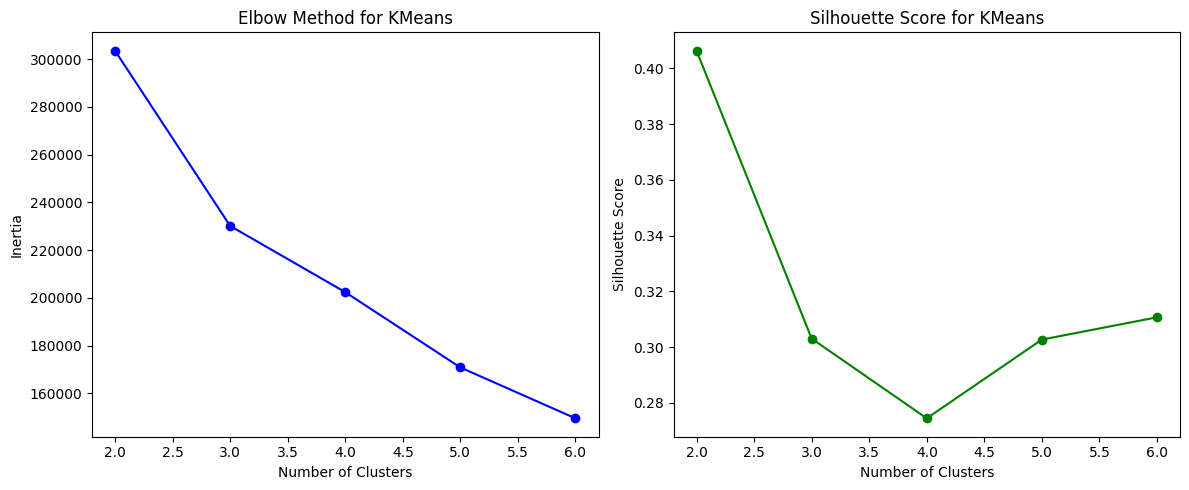

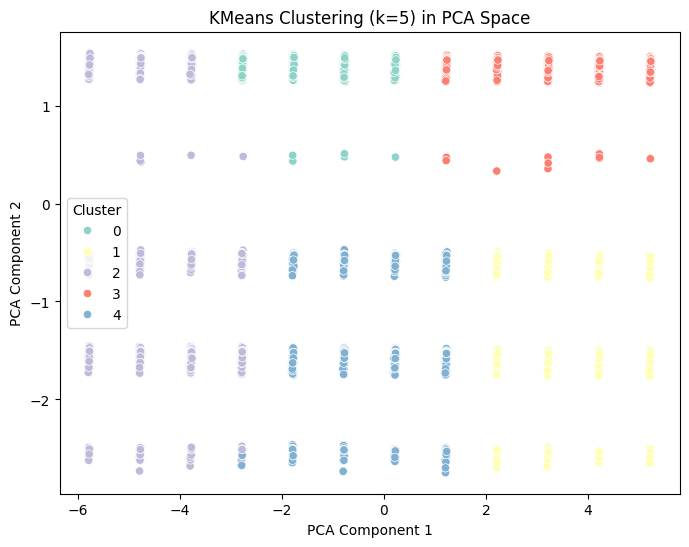

C:\Users\angsp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


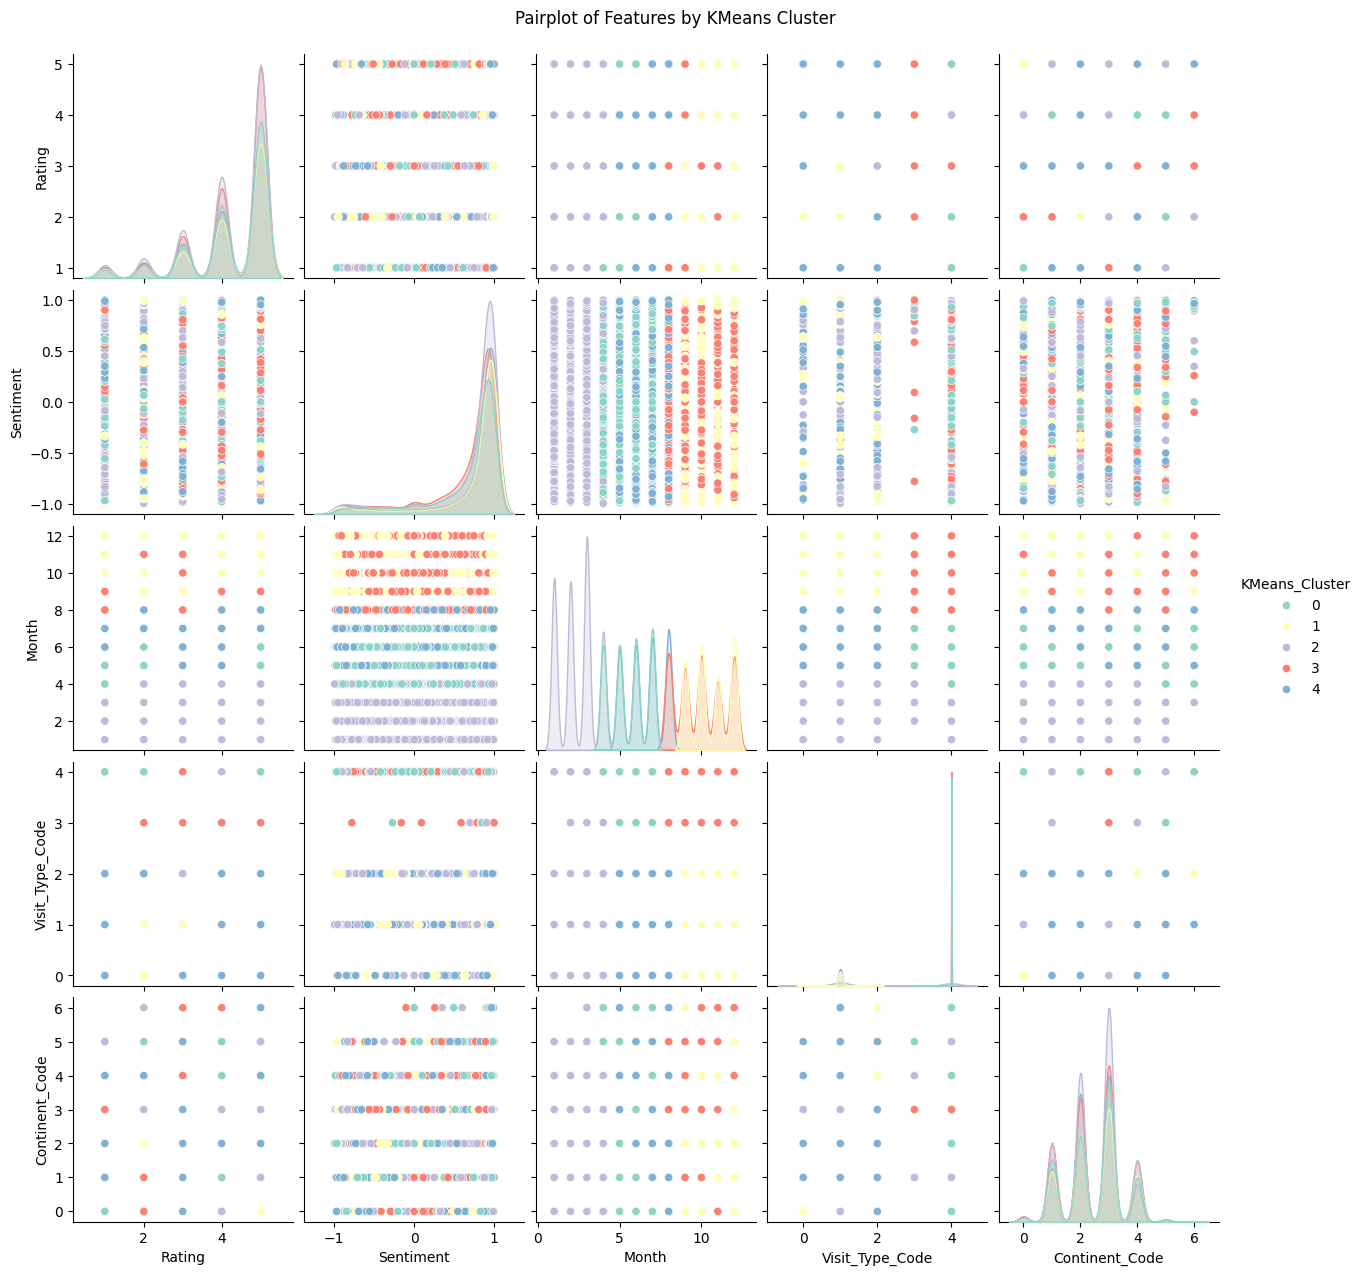

KMeans Cluster Descriptive Statistics:

                Rating                                              Sentiment  \
                 count      mean       std  min  25%  50%  75%  max     count   
KMeans_Cluster                                                                  
0               7370.0  4.250204  1.025302  1.0  4.0  5.0  5.0  5.0    7370.0   
1               6623.0  4.238714  1.070710  1.0  4.0  5.0  5.0  5.0    6623.0   
2               9875.0  4.220759  1.051189  1.0  4.0  5.0  5.0  5.0    9875.0   
3               8964.0  4.293396  1.007634  1.0  4.0  5.0  5.0  5.0    8964.0   
4               7335.0  4.136878  1.114557  1.0  4.0  5.0  5.0  5.0    7335.0   

                          ... Visit_Type_Code      Continent_Code            \
                    mean  ...             75%  max          count      mean   
KMeans_Cluster            ...                                                 
0               0.640273  ...             4.0  4.0         7370.0  2.48724

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


df_km = df_all.copy()
df_km['Visit_Type_Code'] = df_km['Visit_Type'].astype('category').cat.codes
df_km['Continent_Code'] = df_km['Continent'].astype('category').cat.codes
features = ['Rating', 'Sentiment', 'Month', 'Visit_Type_Code', 'Continent_Code']
X = df_km[features]

inertia = []
sil_scores = []
k_range = range(2, 7) 

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    inertia.append(km.inertia_)
    score = silhouette_score(X, labels)
    sil_scores.append(score)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o', color='blue')
plt.title('Elbow Method for KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores, marker='o', color='green')
plt.title('Silhouette Score for KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Opitmal K Based on the plots
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_km['KMeans_Cluster'] = kmeans.fit_predict(X)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df_km['KMeans_Cluster'], palette='Set3')
plt.title(f'KMeans Clustering (k={optimal_k}) in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.show()

sns.pairplot(df_km, vars=features, hue='KMeans_Cluster', palette='Set3')
plt.suptitle('Pairplot of Features by KMeans Cluster', y=1.02)
plt.show()

cluster_profile = df_km.groupby('KMeans_Cluster')[['Rating', 'Sentiment', 'Month', 'Visit_Type_Code', 'Continent_Code']].describe()
print("KMeans Cluster Descriptive Statistics:\n")
print(cluster_profile)


Cluster 1
Rating: Around 3.0 (neutral to slightly positive).
Sentiment: Around 0.73 (moderately positive).
Interpretation:
Visitors in this cluster are reasonably satisfied with the park experience. Their reviews are moderately positive, and their numeric rating is average-to-good.
They might represent a balanced group who saw both pros and cons, but the overall impression is still on the positive side.
Actionable Insights:

Encourage Feedback: Solicit more detailed feedback to find out what minor issues prevent them from giving a higher rating.
Promotional Nudges: Offering them a loyalty program or small incentives could convert them into more enthusiastic repeat visitors.

Cluster 2
Rating: ~2.2 (low).
Sentiment: Possibly around 0.8–0.9 (surprisingly high for a low rating).
Interpretation:
This cluster appears contradictory: a low rating but a positive sentiment. They might highlight certain positives (good staff, nice atmosphere) while still being dissatisfied overall (e.g., high costs, specific ride disappointments).
Alternatively, your sentiment scale might differ, so verifying the numeric range is crucial.
Actionable Insights:

Identify Pain Points: These guests may have found critical flaws overshadowing otherwise positive aspects. A thorough analysis of their text could reveal top complaints (long lines, expensive add-ons, poor accessibility, etc.).
Retention Efforts: Because they speak positively in text, they might be swayed to come back if specific pain points are addressed. Sending them targeted improvement updates or next-visit discounts could help

Cluster 3
Rating: ~1.2–1.5 (very low).
Sentiment: Possibly negative or lower than other clusters.
Interpretation:
This cluster clearly represents dissatisfied customers. The numeric rating is near the bottom of the scale, consistent with significant negative feedback.
They may also mention negative experiences such as poor service, broken rides, or a lack of family-friendly offerings.
Actionable Insights:

Immediate Service Recovery: This cluster should be prioritized for understanding major issues. They’re at high risk of negative word-of-mouth.
Apology & Improvement: Sending apologies, refunds, or major improvements might help recapture some trust. Use their feedback to fix systemic problems (crowding, ride downtime, cost issues).

Cluster 4
Rating: ~4.1+ (the highest among clusters).
Sentiment: Possibly 0.9+ (very positive).
Interpretation:
These visitors are highly satisfied across both numeric rating and textual sentiment. They might be your biggest advocates, thoroughly enjoying rides, staff interactions, and the overall ambiance.
Actionable Insights:

Loyalty & Referrals: Convert these enthusiasts into loyal ambassadors via VIP events, referral bonuses, or exclusive experiences.
Gather Testimonials: Highlight their positive reviews in marketing campaigns or on social media. Encourage them to leave reviews on public platforms.

Actionable Insights

Highly Positive Clusters (like Cluster 4):
Loyalty Programs: Offer exclusive events or loyalty rewards.
Referral Incentives: Encourage them to bring friends or family.

Moderately Satisfied Clusters (like Cluster 0 and 1):
Targeted Surveys: Identify small improvements (shorter lines, ride maintenance, better meal options).
Upsell / Next-Visit Deals: Provide moderate incentives to push them into a more positive cluster.

Dissatisfied Clusters (Cluster 2 or 3 with lower ratings):
Immediate Service Recovery: Apologize, fix major complaints, offer partial refunds or future discounts.
Root Cause Analysis: Identify if the dissatisfaction is about cost, crowding, ride breakdowns, or staff interactions.

DROPPING ALL VISIT_TYPE = UNKNOWN

C:\Users\angsp\AppData\Local\Temp\ipykernel_7864\4239621001.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DBSCAN_Cluster', y='Rating', data=df_dbscan, palette="Set3")
C:\Users\angsp\AppData\Local\Temp\ipykernel_7864\4239621001.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DBSCAN_Cluster', y='Sentiment', data=df_dbscan, palette="Set3")


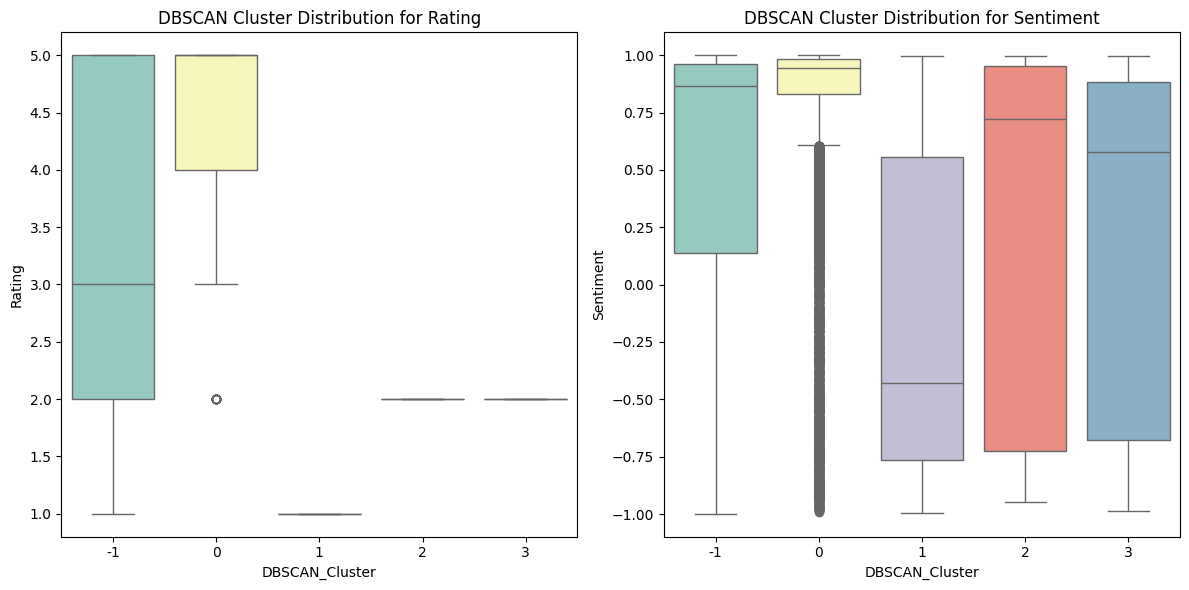

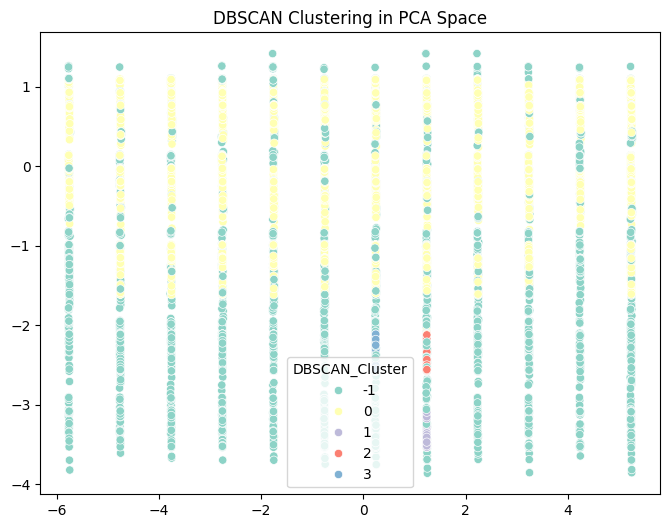

DBSCAN Cluster Descriptive Statistics (Dropping Unknown Visit_Type):

                 Rating                                               \
                  count      mean       std  min  25%  50%  75%  max   
DBSCAN_Cluster                                                         
-1               4502.0  3.143714  1.411384  1.0  2.0  3.0  5.0  5.0   
 0              15104.0  4.528337  0.662154  2.0  4.0  5.0  5.0  5.0   
 1                 65.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
 2                 58.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0   
 3                 49.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0   

               Sentiment            ... Visit_Type_Code      Continent_Code  \
                   count      mean  ...             75%  max          count   
DBSCAN_Cluster                      ...                                       
-1                4502.0  0.473332  ...             2.0  3.0         4502.0   
 0               15104.0  0.811568  .

In [ ]:
df_dbscan = df_all.copy()

df_dbscan = df_dbscan[df_dbscan['Visit_Type'] != 'Unknown'].copy()

df_dbscan['Visit_Type_Code'] = df_dbscan['Visit_Type'].astype('category').cat.codes
df_dbscan['Continent_Code'] = df_dbscan['Continent'].astype('category').cat.codes

features = ['Rating', 'Sentiment', 'Month', 'Visit_Type_Code', 'Continent_Code']
X = df_dbscan[features]

dbscan = DBSCAN(eps=1, min_samples=45) 
df_dbscan['DBSCAN_Cluster'] = dbscan.fit_predict(X)

# Visualize DBSCAN clustering (Boxplots)
plt.figure(figsize=(12, 6))

# Rating distribution by DBSCAN cluster
plt.subplot(1, 2, 1)
sns.boxplot(x='DBSCAN_Cluster', y='Rating', data=df_dbscan, palette="Set3")
plt.title('DBSCAN Cluster Distribution for Rating')

# Sentiment distribution by DBSCAN cluster
plt.subplot(1, 2, 2)
sns.boxplot(x='DBSCAN_Cluster', y='Sentiment', data=df_dbscan, palette="Set3")
plt.title('DBSCAN Cluster Distribution for Sentiment')

plt.tight_layout()
plt.show()

# DBSCAN in PCA space
pca = PCA(n_components=2)
pca_components_dbscan = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components_dbscan[:, 0], y=pca_components_dbscan[:, 1], 
                hue=df_dbscan['DBSCAN_Cluster'], palette='Set3')
plt.title('DBSCAN Clustering in PCA Space')
plt.show()

dbscan_stats = df_dbscan.groupby('DBSCAN_Cluster')[['Rating', 'Sentiment', 'Month', 'Visit_Type_Code', 'Continent_Code']].describe()
print("DBSCAN Cluster Descriptive Statistics (Dropping Unknown Visit_Type):\n")
print(dbscan_stats)

Hard to tell if there is any significant improvement (although seems to worsen) in the clustering. Will not make analysis but leave it here as archive